## Системы компьютерной математики Кротов Илья Павлович 381908-2 Вариант 17

*Метод Штрассена* умножения матриц заключается в разбиении матрицы на 4 равные клетки
$$
\left(
\begin{array}{cc}
C_{11} & C_{12}   \\
C_{21} & C_{22}   \\
\end{array}
\right)
=
\left(
\begin{array}{cc}
A_{11} & A_{12}   \\
A_{21} & A_{22}   \\
\end{array}
\right)
\cdot
\left(
\begin{array}{cc}
B_{11} & B_{12}   \\
B_{21} & B_{22}   \\
\end{array}
\right),
$$
 и нахождения
произведения по формулам:
$$
\begin{array}{l}
D_1 = (A_{11} + A_{22}) \cdot (B_{11} + B_{22}), \\
D_2 = (A_{12} - A_{22}) \cdot (B_{21} + B_{22}), \\
D_3 = (A_{11} - A_{21}) \cdot (B_{11} + B_{12}), \\
D_4 = (A_{11} + A_{12}) \cdot B_{22}, \\
D_5 = (A_{21} + A_{22}) \cdot B_{11}, \\
D_6 = A_{11} \cdot (B_{12} - B_{22}), \\
D_7 = A_{22} \cdot (-B_{11}+B_{21}), \\
\end{array}
$$
  \begin{array}{l}
    C_{11}  =    D_1   +   D_2             -   D_4                      +    D_7   ,\\
    C_{12}  =                                  D_4            +    D_6,             \\
    C_{21}  =                                            D_5            +    D_7   ,\\
    C_{22}  =    D_1             -   D_3             -   D_5  +    D_6.             \\
  \end{array}


Подключим необходимые библиотеки:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math

Для начала напишем функцию, выполняющую обычный алгоритм перемножения матриц:

In [3]:
def UsualAlg(A,B):
    n=len(A)
    C = np.zeros((n*n), dtype=np.int).reshape(n,n)
    if(n==1):
        return A[0][0]*B[0][0]
    else:
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    C[i][j] += A[i][k] * B[k][j]
        return C

Напишем функцию,выполняющую алгоритм Штрассена:

In [4]:
def strassen(A,B):
    n = len(A)
    if n == 1:
        return A[0][0] * B[0][0]
    else:
        C = np.zeros((n*n), dtype=np.int).reshape(n,n)
        k = n//2
        
        a11,a21,a12,a22 = A[:k,:k], A[k:, :k], A[:k, k:], A[k:, k:]
        b11,b21,b12,b22 = B[:k,:k], B[k:, :k], B[:k, k:], B[k:, k:]


        d1 = strassen(a11+a22,b11+b22)
        d2 = strassen(a12-a22,b21+b22)
        d3 = strassen(a11-a21,b11+b12)
        d4 = strassen(a11+a12,b22)
        d5 = strassen(a21+a22,b11)
        d6 = strassen(a11,b12-b22)
        d7 = strassen(a22,b21-b11)

        C[:k,:k] = d1+d2-d4+d7
        C[:k, k:] = d4+d6
        C[k:, :k] = d5+d7
        C[k:, k:] = d1-d3-d5+d6

    return C

Теперь можно приступить к исследованию.Напишем код,реализующий тестирование функций:

In [106]:
j=9
kol=np.zeros(j)
times=np.zeros((j),dtype=np.float)
times1=np.zeros((j),dtype=np.float)
for k in range (j):
    n=2**k
    kol[k]=n
    A = np.random.uniform(0,1, size=(n,n))
    B = np.random.uniform(0,1, size=(n,n))
    start=time.monotonic()
    C=strassen(A,B)
    t=time.monotonic()-start
    times[k]=t
    start=time.monotonic()
    C=UsualAlg(A,B)
    t=time.monotonic()-start
    times1[k]=t

Теперь на графике проиллюстрируем,как быстро растет время выполнения обоих алгоритмов:

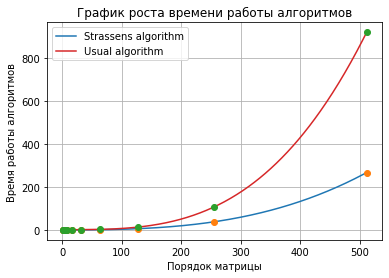

In [75]:
#алгоритм Штрассена
f = np.polyfit(kol, times, 3)
xx = np.linspace(0, 2**(kol.shape[0]-1), 500)
yy = np.polyval(f, xx)
plt.plot(xx, yy, color = 'tab:blue',label='Strassens algorithm')
plt.plot(kol, times, 'o', color = 'tab:orange')

#обычный алгоритм перемножения матриц
f1=np.polyfit(kol, times1, 3)
xx1 = np.linspace(0, 2**(kol.shape[0]-1), 500)
yy1 = np.polyval(f1, xx1)
plt.plot(xx1, yy1, color = 'tab:red',label='Usual algorithm')
plt.plot(kol, times1, 'o', color = 'tab:green')

plt.title('График роста времени работы алгоритмов')
plt.xlabel('Порядок матрицы')
plt.ylabel('Время работы алгоритмов')
plt.legend()
plt.grid()

Видно,что в матрицах, порядок которых $2^5$и более, алгоритм Штрассена работает быстрее, причем, чем больше порядок матриц, тем больше разница во времени работы алгоритмов.

Продолжим исследование и попробуем доказать асимптотику данных алгоритмов - n^log2(7) для алгоритма Штрассена и $n^3$ для обычного алгоритма перемножения матрицы.Для этого построим графики $\frac{f(n)}{n^3}$ и $\frac{f1(n)}{n^log2(7)}$:

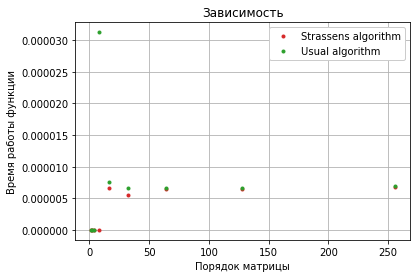

In [107]:
#алгоритм Штрассена
d1=[]
for i in range (0,len(times)):
    d10 = times[i]/(kol[i]**(math.log2(7)))
    d1.append(d10)
plt.plot(kol, d1 , '.', label ='Strassens algorithm',color = 'tab:red')


#обычный алгоритм перемножения матриц
d=[]
for i in range (0,len(times1)):
    d0 = times1[i]/(kol[i]**3)
    d.append(d0)
plt.plot(kol, d , '.', label ='Usual algorithm',color = 'tab:green')

plt.legend(loc = 'best', framealpha = 1)
plt.xlabel("Порядок матрицы")
plt.ylabel("Время работы функции")
plt.title("Зависимость")
pass

plt.grid()

Можно заметить,что из-за нехватки вычислительной мощности и погрешности измерений, результаты получается не совсем точные и часть графика является константым 0.Но даже по таким данным можно сделать вывод,что время работы обычного алгоритма умножения матрицы растет кубически, а алгоритма Штрассена согласно графику n^log2(7).

# Выводы:

Я провел исследовательскую работу и выяснил,что алгоритм Штрассена работает быстрее стандартного алгоритма перемножения матриц для матриц порядка  $2^n$,начиная с размерности $2^5*2^5$.
Кроме того,я сравнил график с реальной асипмтотикой и выяснил,что время выполнения обычного алгоритма умножения матриц растет кубически,а алгоритма Штрассена по графику n^log2(7).